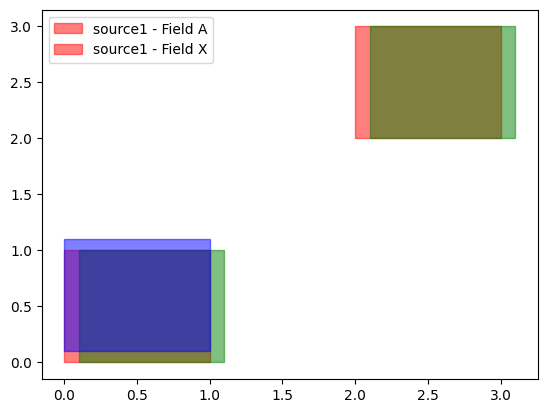

{'Field A': [('source1',
   {'name': 'Field A', 'geometry': <POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>}),
  ('source2',
   {'name': 'Field A',
    'geometry': <POLYGON ((0.1 0, 1.1 0, 1.1 1, 0.1 1, 0.1 0))>}),
  ('source3',
   {'name': 'Field A',
    'geometry': <POLYGON ((0 0.1, 1 0.1, 1 1.1, 0 1.1, 0 0.1))>})],
 'Field X': [('source1',
   {'name': 'Field X', 'geometry': <POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))>}),
  ('source2',
   {'name': 'Field X',
    'geometry': <POLYGON ((2.1 2, 3.1 2, 3.1 3, 2.1 3, 2.1 2))>})]}

In [126]:
from shapely.geometry import Polygon
from shapely.ops import unary_union
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon
from typing import List, Dict, Tuple, Any

# Sample data structure for field entries in multiple sources
fields_sources = {
    'source1': [
        {'name': 'Field A', 'geometry': Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])},
        {'name': 'Field B', 'geometry': Polygon([(10, 10), (11, 10), (11, 11), (10, 11)])},
        {'name': 'Field X', 'geometry': Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])}
    ],
    'source2': [
        {'name': 'Field A', 'geometry': Polygon([(0.1, 0), (1.1, 0), (1.1, 1), (0.1, 1)])},
        {'name': 'Field C', 'geometry': Polygon([(20, 20), (21, 20), (21, 21), (20, 21)])},
        {'name': 'Field X', 'geometry': Polygon([(2.1, 2), (3.1, 2), (3.1, 3), (2.1, 3)])}
    ],
    'source3': [
        {'name': 'Field A', 'geometry': Polygon([(0, 0.1), (1, 0.1), (1, 1.1), (0, 1.1)])},
        {'name': 'Field D', 'geometry': Polygon([(30, 30), (31, 30), (31, 31), (30, 31)])}
    ]
}

def calculate_overlap(poly1: Polygon, poly2: Polygon) -> float:
    """ Calculate the percentage overlap between two polygons """
    intersection = poly1.intersection(poly2).area
    union = unary_union([poly1, poly2]).area
    return intersection / union if union != 0 else 0

def match_fields_all_sources(sources: Dict[str, List[Dict]], name_threshold: int, geom_threshold: float) -> Dict[str, List[Tuple[str, Any]]]:
    """ Match fields across all sources based on name similarity and geometric overlap """
    field_groups = {}
    for source, fields in sources.items():
        for field in fields:
            field_name = field['name']
            if field_name not in field_groups:
                field_groups[field_name] = []
            field_groups[field_name].append((source, field))
    multi_matches = {}
    for field_name, entries in field_groups.items():
        if len(entries) >= 2:
            is_match = True
            base_geom = entries[0][1]['geometry']
            for source, field in entries:
                geom_overlap = calculate_overlap(base_geom, field['geometry'])
                if geom_overlap < geom_threshold:
                    is_match = False
                    break
            if is_match:
                multi_matches[field_name] = entries
    return multi_matches

def plot_matched_fields(matches: Dict[str, List[Tuple[str, Any]]]):
    """ Plot the original boundaries of the matched fields """
    fig, ax = plt.subplots()
    colors = ['red', 'green', 'blue', 'yellow']
    for field_name, fields in matches.items():
        for idx, (source, field) in enumerate(fields):
            poly = field['geometry']
            x,y = poly.exterior.xy
            ax.fill(x, y, alpha=0.5, color=colors[idx % len(colors)], label=f'{source} - {field_name}' if idx == 0 else "")
        ax.autoscale_view()
        ax.legend()
    plt.show()

# Set thresholds for name similarity and geometric overlap
name_threshold = 90  # percentage
geom_threshold = 0.5  # 50% overlap
matches = match_fields_all_sources(fields_sources, name_threshold, geom_threshold)
plot_matched_fields(matches)
matches

In [127]:
from shapely.geometry import Polygon
from shapely.ops import unary_union
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon
from typing import List, Dict, Tuple, Any, Set

# Sample data structure for field entries in multiple sources, with realistic field names
fields_sources = {
    'source1': [
        {'name': 'Cornfield', 'geometry': Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])},
        {'name': 'Soybean Plot', 'geometry': Polygon([(10, 10), (11, 10), (11, 11), (10, 11)])},
        {'name': 'Wheat Field', 'geometry': Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])}
    ],
    'source2': [
        {'name': 'Cornfield', 'geometry': Polygon([(0.1, 0), (1.1, 0), (1.1, 1), (0.1, 1)])},
        {'name': 'Barley Field', 'geometry': Polygon([(20, 20), (21, 20), (21, 21), (20, 21)])},
        {'name': 'Wheat Field', 'geometry': Polygon([(2.1, 2), (3.1, 2), (3.1, 3), (2.1, 3)])}
    ],
    'source3': [
        {'name': 'Cornfield', 'geometry': Polygon([(0, 0.1), (1, 0.1), (1, 1.1), (0, 1.1)])},
        {'name': 'Rice Paddy', 'geometry': Polygon([(30, 30), (31, 30), (31, 31), (30, 31)])},
        {'name': 'Whaet Field', 'geometry': Polygon([(2, 2.1), (3, 2.1), (3, 3.1), (2, 3.1)])}
    ]
}

def calculate_overlap(poly1: Polygon, poly2: Polygon) -> float:
    """ Calculate the percentage overlap between two polygons """
    intersection = poly1.intersection(poly2).area
    union = unary_union([poly1, poly2]).area
    return intersection / union if union != 0 else 0

def match_fields_all_sources(sources: Dict[str, List[Dict]], name_threshold: int, geom_threshold: float) -> Dict[int, List[Tuple[str, str, Any]]]:
    """ Match fields across all sources based on name similarity and geometric overlap """
    match_groups = {}
    group_id = 0
    seen: Set[Tuple[str, str]] = set()  # To track processed fields
    for source1, fields1 in sources.items():
        for field1 in fields1:
            for source2, fields2 in sources.items():
                if source1 != source2:
                    for field2 in fields2:
                        if (source1, field1['name']) not in seen and (source2, field2['name']) not in seen:
                            if fuzz.ratio(field1['name'], field2['name']) >= name_threshold:
                                geom_overlap = calculate_overlap(field1['geometry'], field2['geometry'])
                                if geom_overlap >= geom_threshold:
                                    if group_id not in match_groups:
                                        match_groups[group_id] = []
                                    match_groups[group_id].extend([
                                        (source1, field1['name'], field1['geometry']),
                                        (source2, field2['name'], field2['geometry'])
                                    ])
                                    seen.update([(source1, field1['name']), (source2, field2['name'])])
                                    group_id += 1
    return match_groups

# Set thresholds for name similarity and geometric overlap
name_threshold = 80  # percentage
geom_threshold = 0.5  # 50% overlap
match_groups = match_fields_all_sources(fields_sources, name_threshold, geom_threshold)
match_groups


{0: [('source1', 'Cornfield', <POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>),
  ('source2', 'Cornfield', <POLYGON ((0.1 0, 1.1 0, 1.1 1, 0.1 1, 0.1 0))>)],
 1: [('source1', 'Wheat Field', <POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))>),
  ('source2', 'Wheat Field', <POLYGON ((2.1 2, 3.1 2, 3.1 3, 2.1 3, 2.1 2))>)]}

In [128]:
#clean data for gogi
import geopandas as gpd
gogi_global = gpd.read_file("/Users/yaqifan/Desktop/2024Spring/research/previous database/gogi_v10_3_1shp/Fields.shp")
gogi_br = gogi_global.loc[gogi_global['MD_Country'] == 'Brazil']
gogi_brgogi_br = gogi_global.loc[gogi_global['MD_Country'] == 'Brazil']
gogi_br_clean = gogi_br[gogi_br["Facility_N"].str.contains("Basin") == False]
gogi_br_clean= gogi_br_clean[gogi_br_clean.duplicated(subset="Facility_N")]
gogi_br_clean.to_file("../data/br_geodata/gogi/BR.shp", set_crs = "EPSG:4326")

In [25]:
#clean data for ANP
import geopandas as gpd
import pandas as pd

anp_field = pd.read_excel("/Users/yaqifan/Desktop/2024Spring/research/Brazil/field registration data_translated.xlsx")
anp_prod = pd.read_excel("/Users/yaqifan/Desktop/2024Spring/research/Brazil/field_production_data.xlsx")
anp_field_num = pd.merge(anp_field,anp_prod,on='Field',how="left")
anp_gdf = gpd.read_file("/Users/yaqifan/Desktop/2024Spring/research/previous database/CAMPOS_PRODUCAO_SIRGAS/CAMPOS_PRODUCAO_SIRGASPolygon.shp")
anp_br = anp_gdf.merge(anp_field_num, left_on="NOM_CAMPO", right_on="Field", how = "left")
ls = ['Discovery','Start of Production','Production End Forecast','End of Production']
for l in ls:
  anp_br[l+'_date'] = anp_br[l].dt.strftime("%Y-%m-%d")
anp_br = anp_br.drop(labels=ls,axis=1)
anp_br = anp_br.astype({'Commerciality': 'str'})
anp_br.to_file("../data/br_geodata/anp/BR.shp")


/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0000gn/T/ipykernel_52752/3206757103.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  anp_br.to_file("../data/br_geodata/anp/BR.shp")


In [1]:
#read data
anp = gpd.read_file("../data/br_geodata/anp/BR.shp")
wm = gpd.read_file("../data/br_geodata/wm/BR.shp")
gogi = gpd.read_file("../data/br_geodata/gogi/BR.shp")
zhan = gpd.read_file("../data/br_geodata/br_zhan/BR.shp")

NameError: name 'gpd' is not defined

In [44]:
import re
from unidecode import unidecode

def clean_field_names(df, column_name='field_name'):
    # Clean the field name column if it exists
    if column_name in df.columns:
        df[column_name] = df[column_name].str.replace(r'[^\w\s]', '', regex=True)
        df[column_name] = df[column_name].str.strip().str.lower()
        for i,r in df.iterrows():
            if r[column_name] is not None:
                df.loc[i, column_name] = unidecode(r[column_name])
    return df

anp = clean_field_names(anp, 'Field')  # Adjust 'field_name' as per your actual column
wm = clean_field_names(wm, 'field_name_unique') 
gogi = clean_field_names(gogi, 'Facility_N') 
zhan = clean_field_names(zhan, 'N_Fldname') 

In [55]:
target_crs = 'EPSG:4326'  # WGS 84, or choose an appropriate CRS for your data
anp = anp.to_crs(target_crs)
wm = wm.to_crs(target_crs)
gogi = gogi.to_crs(target_crs)
zhan = zhan.to_crs(target_crs)

In [66]:
wm_br_field = pd.read_excel("../data/br_geodata/wm/wm_field_br.xlsx")

wm = wm.merge(wm_br_field, left_on="id_field_a", right_on="id_field", how = "left")

In [69]:
fields_sources = {
    'anp': [
        {'name': row['Field'], 'geometry': row['geometry']}
        for index, row in anp.iterrows()
    ],
    'wm': [
        {'name': row['field_name_unique'], 'geometry': row['geometry']}
        for index, row in wm.iterrows()
    ],
    'gogi': [
        {'name': row['Facility_N'], 'geometry': row['geometry']}
        for index, row in gogi.iterrows()
    ],
    'zhan': [
        {'name': row['N_Fldname'], 'geometry': row['geometry']}
        for index, row in zhan.iterrows()
    ]
}
fields_sources

{'anp': [{'name': 'irara',
   'geometry': <POLYGON ((-39.813 -19.25, -39.813 -19.253, -39.813 -19.256, -39.813 -19.258...>},
  {'name': 'pescada',
   'geometry': <POLYGON ((-36.766 -4.74, -36.769 -4.74, -36.771 -4.74, -36.774 -4.74, -36.7...>},
  {'name': 'salgo',
   'geometry': <POLYGON ((-36.576 -10.633, -36.578 -10.633, -36.581 -10.633, -36.584 -10.63...>},
  {'name': 'caxareu',
   'geometry': <POLYGON ((-40.078 -21.393, -40.078 -21.396, -40.081 -21.396, -40.081 -21.39...>},
  {'name': 'cexis',
   'geometry': <POLYGON ((-38.464 -12.625, -38.461 -12.625, -38.459 -12.625, -38.456 -12.62...>},
  {'name': 'camarupim',
   'geometry': <POLYGON ((-39.589 -19.954, -39.592 -19.954, -39.594 -19.954, -39.597 -19.95...>},
  {'name': 'moreia',
   'geometry': <POLYGON ((-40.06 -22.295, -40.063 -22.295, -40.065 -22.295, -40.068 -22.295...>},
  {'name': 'pintassilgo',
   'geometry': <POLYGON ((-37.193 -5.211, -37.196 -5.211, -37.198 -5.211, -37.201 -5.211, -...>},
  {'name': 'livramento',
   'geome

In [71]:
name_threshold = 80  # percentage
geom_threshold = 0.5  # 50% overlap
match_groups = match_fields_all_sources(fields_sources, name_threshold, geom_threshold)
match_groups

{0: [('anp',
   'pescada',
   <POLYGON ((-36.766 -4.74, -36.769 -4.74, -36.771 -4.74, -36.774 -4.74, -36.7...>),
  ('gogi',
   'pescada',
   <POLYGON ((-36.766 -4.677, -36.766 -4.68, -36.766 -4.683, -36.766 -4.685, -3...>)],
 1: [('anp',
   'salgo',
   <POLYGON ((-36.576 -10.633, -36.578 -10.633, -36.581 -10.633, -36.584 -10.63...>),
  ('wm',
   'Salgo',
   <POLYGON ((-36.579 -10.636, -36.579 -10.637, -36.579 -10.638, -36.58 -10.638...>)],
 2: [('anp',
   'caxareu',
   <POLYGON ((-40.078 -21.393, -40.078 -21.396, -40.081 -21.396, -40.081 -21.39...>),
  ('gogi',
   'caxareu',
   <POLYGON ((-40.05 -21.378, -40.05 -21.381, -40.05 -21.383, -40.05 -21.386, -...>)],
 3: [('anp',
   'cexis',
   <POLYGON ((-38.464 -12.625, -38.461 -12.625, -38.459 -12.625, -38.456 -12.62...>),
  ('wm',
   'Cexis',
   <MULTIPOLYGON (((-38.489 -12.693, -38.49 -12.693, -38.49 -12.693, -38.491 -1...>)],
 4: [('anp',
   'camarupim',
   <POLYGON ((-39.589 -19.954, -39.592 -19.954, -39.594 -19.954, -39.597 -19.95...>

In [130]:
gogi['Onshore_Of']

0      Offshore
1       Onshore
2       Onshore
3       Onshore
4       Onshore
         ...   
434     Onshore
435     Onshore
436     Onshore
437     Onshore
438    Offshore
Name: Onshore_Of, Length: 439, dtype: object

In [134]:
import pandas as pd
import numpy as np

def aggregate_field_data(match_group, sources_gdfs):
    # Initialize the dictionary to hold aggregated data
    aggregated_data = {
        'Function unit': [],
        'Field location': None,
        'Field name list': [],
        'Field age year': [],
        'Field depth': [],
        'Oil production bbl/d': [],
        'Number of producing wells': [],
        'Offshore': [],
        'API': [],
        'CO2': [],
        'H2S': [],
        'GOR_scf/bbl': [],
        'WOR': [],
        'FOR_scf/bbl': [],
        'Reservoir permeability': [],
        'Reservoir thickness': []
    }
    
    # Iterate over each match in the group to collect data
    for source, field_name, _ in match_group:
        gdf = sources_gdfs[source]
        # Update the field name list
        aggregated_data['Field name list'].append(field_name)
        aggregated_data['Field location'] = 'Brazil'

        if source == 'zhan':
            # Filter the data for the specific field
            field_data = gdf[gdf['N_Fldname'] == field_name].iloc[0]
            if field_data['Product_Ty'] is not None:
                if field_data['Product_Ty'].lower() in ('oil', 'gas'):
                    aggregated_data['Function unit'].append(field_data['Product_Ty'].lower())
            if field_data['SUM_GOR'] is not None:
                aggregated_data['GOR_scf/bbl'].append(field_data['SUM_GOR'])
            if field_data['SUM_OIL_PR'] is not None:
                aggregated_data['Oil production bbl/d'].append(field_data['SUM_OIL_PR']/365)
                if field_data['BCM_2019'] is not None:
                    aggregated_data['FOR_scf/bbl'].append(field_data['BCM_2019'] * 35314666572.222 / field_data['SUM_OIL_PR'])
            
        if source == 'wm':
            field_data = gdf[gdf['field_name_unique'] == field_name].iloc[0]
            if field_data['field_oil_gas'] is not None:
                if field_data['field_oil_gas'].lower() in ('oil', 'gas'):
                    aggregated_data['Function unit'].append(unidecode(field_data['field_oil_gas'].lower()))
            if field_data['field_year_production_start'] is not None:
                aggregated_data['Field age year'].append(field_data['field_year_production_start'])
            if field_data['f_production_curr__kbd'] is not None:
                aggregated_data['Oil production bbl/d'].append(field_data['f_production_curr__kbd']*1000)
            if field_data['onshore_offshore_tags'] is not None:
                if field_data['onshore_offshore_tags'].lower() in ('onshore','offshore'):
                    aggregated_data['Offshore'].append(field_data['onshore_offshore_tags'].lower())
            if field_data['f_api__api'] is not None:
                aggregated_data['API'].append(field_data['f_api__api'])
            if field_data['f_co2__prc'] is not None:
                aggregated_data['CO2'].append(field_data['f_co2__prc'])
            if field_data['f_h2s__ppm'] is not None:
                aggregated_data['H2S'].append(field_data['f_h2s__ppm'])
            if field_data['f_gas_oil_ratio__fbl'] is not None:
                aggregated_data['GOR_scf/bbl'].append(field_data['f_gas_oil_ratio__fbl'])
            if field_data['f_permeability__md'] is not None:
                aggregated_data['Reservoir permeability'].append(field_data['f_permeability__md'])
            if field_data['f_reservoir_depth__mtr'] is not None:
                aggregated_data['Reservoir thickness'].append(field_data['f_reservoir_depth__mtr'])
            
        if source == 'anp':
            field_data = gdf[gdf['Field'] == field_name].iloc[0]
            if field_data['Main Fluid'] is not None:
                if field_data['Main Fluid'].lower() in ('oil', 'gas'):
                    aggregated_data['Function unit'].append(unidecode(field_data['Main Fluid'].lower()))
            if field_data['Start of P'] is not None:
                # start, stop, step = 0,4,1
                aggregated_data['Field age year'].append(field_data['Start of P'][0:4])
            if field_data['Oil (bbl/d'] is not None:
                aggregated_data['Oil production bbl/d'].append(field_data['Oil (bbl/d'])
                if field_data['Natural Ga'] is not None:
                    aggregated_data['GOR_scf/bbl'].append(field_data['Natural Ga']*6000/field_data['Oil (bbl/d'])
                if field_data['Water (bbl'] is not None:
                    aggregated_data['WOR'].append(field_data['Water (bbl']*6000/field_data['Oil (bbl/d'])
            if field_data['Number of'] is not None:
                aggregated_data['Number of producing wells'].append(field_data['Number of'])
            if field_data['Location_x'] == 'Earth':
                aggregated_data['Offshore'].append('onshore')
            if field_data['Location_x'] == 'Sea':
                aggregated_data['Offshore'].append('offshore')
            if field_data['API Petrol'] is not None:
                aggregated_data['API'].append(field_data['API Petrol'])
            
        if source == 'gogi':
            field_data = gdf[gdf['Facility_N'] == field_name].iloc[0]
            if field_data['Commodity'] is not None:
                if field_data['Commodity'].lower() in ('oil', 'gas'):
                    aggregated_data['Function unit'].append(field_data['Commodity'].lower())
            if field_data['Installati'] is not None:
                # start, stop, step = 6,10,1
                aggregated_data['Field age year'].append(field_data['Installati'][6:10])
            if field_data['Onshore_Of'] is not None:
                if field_data['Onshore_Of'] in ('offshore', 'onshore'):
                    aggregated_data['Offshore'].append(field_data['Onshore_Of'].lower())

    return aggregated_data


# Example setup for sources_gdfs (ensure this matches your actual data structure)
sources_gdfs = {
    'anp': anp,
    'wm': wm,
    'gogi': gogi,
    'zhan': zhan
}

# List to hold all aggregated data for each match group
all_aggregated_data = []

for group_id, matches in match_groups.items():
    aggregated_data = aggregate_field_data(matches, sources_gdfs)
    all_aggregated_data.append(aggregated_data)

# Convert to DataFrame for easier handling and visualization
df_aggregated = pd.DataFrame(all_aggregated_data)
print(df_aggregated.head())

/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0000gn/T/ipykernel_52752/4005755121.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  aggregated_data['GOR_scf/bbl'].append(field_data['Natural Ga']*6000/field_data['Oil (bbl/d'])
/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0000gn/T/ipykernel_52752/4005755121.py:83: RuntimeWarning: invalid value encountered in scalar divide
  aggregated_data['WOR'].append(field_data['Water (bbl']*6000/field_data['Oil (bbl/d'])
/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0000gn/T/ipykernel_52752/4005755121.py:43: RuntimeWarning: invalid value encountered in scalar divide
  aggregated_data['FOR_scf/bbl'].append(field_data['BCM_2019'] * 35314666572.222 / field_data['SUM_OIL_PR'])
/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0000gn/T/ipykernel_52752/4005755121.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  aggregated_data['GOR_scf/bbl'].append(field_data['Natural Ga']*6000/field_data['Oil (bbl/d'])
/var/folders/8z/nrbsy4n11vvd1rdqlg2hf7lw0

  Function unit Field location         Field name list  Field age year  \
0         [gas]         Brazil      [pescada, pescada]    [1999, 1998]   
1    [oil, oil]         Brazil          [salgo, Salgo]  [1986, 1992.0]   
2         [oil]         Brazil      [caxareu, caxareu]          [1998]   
3    [gas, oil]         Brazil          [cexis, Cexis]  [1966, 1983.0]   
4         [gas]         Brazil  [camarupim, camarupim]    [2009, 1998]   

  Field depth         Oil production bbl/d Number of producing wells  \
0          []         [37.791781160000006]                     [6.0]   
1          []                   [nan, nan]                     [nan]   
2          []                        [nan]                     [nan]   
3          []  [365.04517321000003, 548.0]                    [35.0]   
4          []                        [nan]                     [nan]   

               Offshore           API     CO2    H2S  \
0            [offshore]        [42.0]      []     []   
1  [offsho

In [135]:
df_aggregated

In [140]:
from fuzzywuzzy import fuzz
from collections import defaultdict
# Function to normalize text (case insensitive comparison)
def normalize_text(text):
    return text.lower().strip()

# Function to merge similar items based on the second element of tuples (fuzzy string match)
def merge_groups(data):
    new_groups = []
    index_mapping = {}
    for group_id, items in data.items():
        for item in items:
            added = False
            item_name_normalized = normalize_text(item[1])
            for index, (group_name, group_items) in enumerate(new_groups):
                if fuzz.token_sort_ratio(group_name, item_name_normalized) > 75:
                    group_items.append(item)
                    added = True
                    break
            if not added:
                new_groups.append((item_name_normalized, [item]))

    # Convert list to the original format
    return {i: group_items for i, (_, group_items) in enumerate(new_groups)}

# Apply the merging function
match_groups_expand = merge_groups(match_groups)
match_groups_expand

{0: [('anp',
   'pescada',
   <POLYGON ((-36.766 -4.74, -36.769 -4.74, -36.771 -4.74, -36.774 -4.74, -36.7...>),
  ('gogi',
   'pescada',
   <POLYGON ((-36.766 -4.677, -36.766 -4.68, -36.766 -4.683, -36.766 -4.685, -3...>),
  ('anp',
   'espada',
   <POLYGON ((-38.792 -3.157, -38.795 -3.157, -38.797 -3.157, -38.8 -3.157, -38...>),
  ('gogi',
   'espada',
   <POLYGON ((-38.813 -3.115, -38.81 -3.115, -38.808 -3.115, -38.805 -3.115, -3...>)],
 1: [('anp',
   'salgo',
   <POLYGON ((-36.576 -10.633, -36.578 -10.633, -36.581 -10.633, -36.584 -10.63...>),
  ('wm',
   'Salgo',
   <POLYGON ((-36.579 -10.636, -36.579 -10.637, -36.579 -10.638, -36.58 -10.638...>)],
 2: [('anp',
   'caxareu',
   <POLYGON ((-40.078 -21.393, -40.078 -21.396, -40.081 -21.396, -40.081 -21.39...>),
  ('gogi',
   'caxareu',
   <POLYGON ((-40.05 -21.378, -40.05 -21.381, -40.05 -21.383, -40.05 -21.386, -...>),
  ('anp',
   'xareu',
   <POLYGON ((-39.052 -3.052, -39.055 -3.052, -39.058 -3.052, -39.06 -3.052, -3...>),
  ('g

In [2]:
import geopandas as gpd
#read data
anp = gpd.read_file("../data/br_geodata/anp/BR.shp")
wm = gpd.read_file("../data/br_geodata/wm/BR.shp")
gogi = gpd.read_file("../data/br_geodata/gogi/BR.shp")
zhan = gpd.read_file("../data/br_geodata/br_zhan/BR.shp")

In [9]:
zhan

,Number,N_Fldname,Country,Product_Ty,SUM_OIL_PR,SUM_GOR,BCM_2017,BCM_2018,BCM_2012,BCM_2013,BCM_2014,BCM_2015,BCM_2016,BCM_2019,geometry
0,0,LAGOA PARDA,Brazil,None,360.0,2391.86,0.000000,0.000000,0.001541,0.001894,0.001305,0.000955,0.000000,0.000000,"POLYGON ((-39.82330 -19.59424, -39.82330 -19.5..."
1,1,ARGONAUTA,Brazil,None,32460.0,88.01,0.003595,0.000487,0.000697,0.003217,0.003548,0.003745,0.001239,0.000000,"POLYGON ((-39.89882 -21.19060, -39.89882 -21.1..."
2,2,GAVIdO BRANCO,Brazil,None,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-44.44832 -4.53423, -44.44832 -4.536..."
3,3,TUBARaO AZUL,Brazil,None,0.0,0.00,0.000000,0.000000,0.013150,0.001138,0.002696,0.002614,0.000000,0.000000,"POLYGON ((-41.39624 -23.53696, -41.39624 -23.5..."
4,4,GUANAMBI,Brazil,None,60.0,17.83,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-38.53942 -12.52128, -38.53682 -12.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,335,LAGOSTA,Brazil,None,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-45.17232 -25.22706, -45.17232 -25.2..."
336,336,ACAUd,Brazil,None,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-37.39097 -5.26081, -37.38836 -5.260..."
337,337,CHERNE,Brazil,None,10710.0,165.59,0.010628,0.006352,0.012715,0.014663,0.018735,0.013856,0.014879,0.011549,"POLYGON ((-40.42748 -22.45623, -40.42748 -22.4..."
338,338,ARARACANGA,Brazil,None,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-65.65939 -4.72433, -65.65939 -4.726..."
